In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = {
    'Age': [22, 25, 28, 35, 40, 42, 23, 26, 32, 36, 30, 33, 29, 45, 50],
    'Salary': [20000, 30000, 45000, 60000, 80000, 120000, 25000, 32000, 58000, 75000, 50000, 55000, 47000, 95000, 110000],
    'Education': ['Bachelor', 'Bachelor', 'Master', 'Master', 'PhD', 'PhD', 'Bachelor', 'Bachelor', 'Master', 'Master', 'Bachelor', 'Master', 'Bachelor', 'PhD', 'PhD'],
    'Purchased': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']
}

In [5]:
df = pd.DataFrame(data)

education_encoder = LabelEncoder()
df["Education"] = education_encoder.fit_transform(df["Education"])

target_encoder = LabelEncoder()
df["Purchased"] = target_encoder.fit_transform(df["Purchased"])
# Step 3: Preprocess the data
X = df[['Age', 'Salary', 'Education']]  # Features
y = df['Purchased']   # Target variable
df

,Age,Salary,Education,Purchased
0,22,20000,0,0
1,25,30000,0,0
2,28,45000,1,1
3,35,60000,1,1
4,40,80000,2,1
5,42,120000,2,1
6,23,25000,0,0
7,26,32000,0,0
8,32,58000,1,1
9,36,75000,1,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [13]:
y_pred = nb_model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}")

Model Accuracy: 100.00


In [34]:
age = float(input("Enter Age: "))
salary = float(input("Enter Salary: "))
education = input("Enter Education (Bachelor/Master/PhD): ")
education_encoded = education_encoder.transform([education])[0]
prediction = nb_model.predict([[age, salary, education_encoded]])
predicted_label = target_encoder.inverse_transform(prediction)
print(predicted_label)


Enter Age:  22
Enter Salary:  55000
Enter Education (Bachelor/Master/PhD):  Bachelor


['Yes']


C:\Users\sandy\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


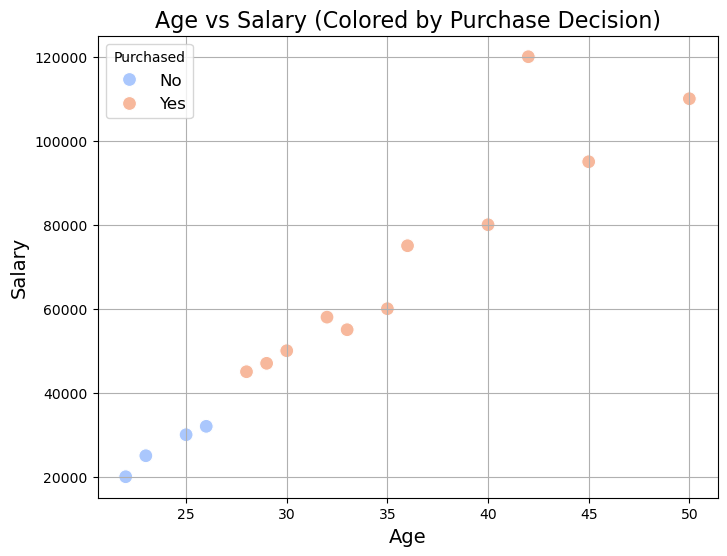

,Age,Salary,Education,Purchased,Purchased_Label
0,22,20000,0,0,No
1,25,30000,0,0,No
2,28,45000,1,1,Yes
3,35,60000,1,1,Yes
4,40,80000,2,1,Yes
5,42,120000,2,1,Yes
6,23,25000,0,0,No
7,26,32000,0,0,No
8,32,58000,1,1,Yes
9,36,75000,1,1,Yes


In [36]:
df["Purchased_Label"] = target_encoder.inverse_transform(df["Purchased"])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Salary", hue="Purchased_Label", palette="coolwarm", s=100)
plt.title("Age vs Salary (Colored by Purchase Decision)", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.legend(title="Purchased", fontsize=12)
plt.grid(True)
plt.show()
df